In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload the datasets
uploaded = files.upload()

# Load the datasets
electricity_prices_df = pd.read_csv('processed_simulated_paths_no_year.csv')
capacity_factors_df = pd.read_csv('Capacity_Data_by_Hour_and_Year.csv')

Saving Capacity_Data_by_Hour_and_Year.csv to Capacity_Data_by_Hour_and_Year.csv
Saving processed_simulated_paths_no_year.csv to processed_simulated_paths_no_year.csv


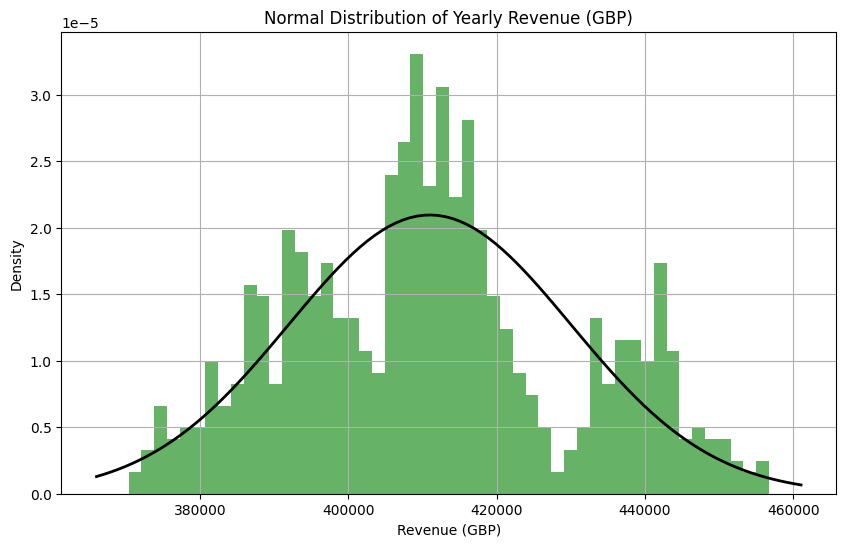

In [ ]:
!pip install numpy-financial
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import random# Define a function to calculate yearly revenue for all combinations of paths and capacity factors
def calculate_revenue_all_combinations(electricity_prices_df, capacity_factors_df):
    revenues = []
    for path in electricity_prices_df.columns[1:]:
        for year in capacity_factors_df.columns[1:]:
            # Select the specific path and year
            electricity_prices = electricity_prices_df[path]
            capacity_factors = capacity_factors_df[year]

            # Calculate the revenue for this combination
            revenue = np.sum(electricity_prices * capacity_factors)
            revenues.append(revenue)

    return revenues

# Calculate revenues for all combinations
revenues = calculate_revenue_all_combinations(electricity_prices_df, capacity_factors_df)

# Plot the normal distribution of the revenues
plt.figure(figsize=(10, 6))
plt.hist(revenues, bins=50, density=True, alpha=0.6, color='g')

# Add the normal distribution curve
mean = np.mean(revenues)
std_dev = np.std(revenues)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std_dev) ** 2) / (std_dev * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.title('Normal Distribution of Yearly Revenue (GBP)')
plt.xlabel('Revenue (GBP)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
total_revenues = len(revenues)
print("Total number of revenues calculated:", total_revenues)


Total number of revenues calculated: 700


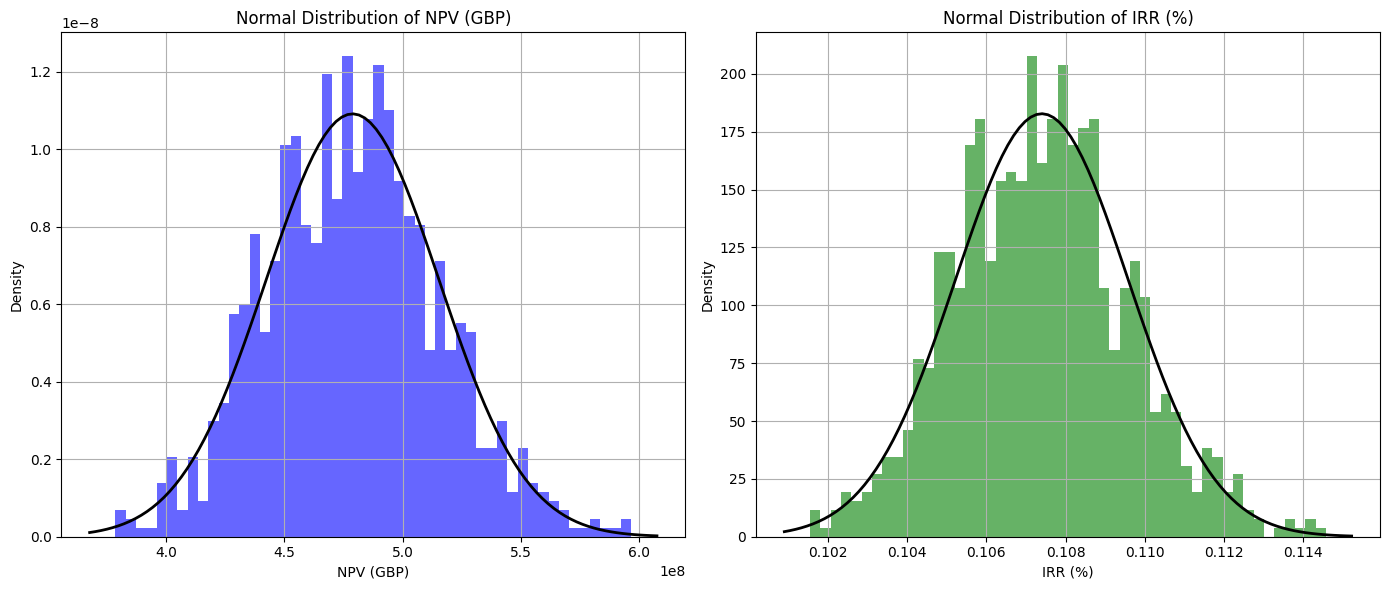

mean_npv: 478813305.77761364 GBP
std_dev_npv: 36570921.04437368 GBP
mean_irr: 10.740190964152124 %
std_dev_irr: 0.2182471925464828 %


In [ ]:

!pip install numpy-financial
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# 已知参数
installed_capacity_mw = 800  # 800 MW
project_lifetime_years = 25  # 项目年限25年
capex_per_kw = 2500  # £2,500 每千瓦 (kW)
opex_per_mw_per_year = 100000  # 每年运营支出
discount_rate = 0.08  # 折现率 8%
annual_degradation = 0.005  # 每年0.5%的效率降低

# 定义电网接入成本
grid_connection_cost_per_km = 750000  # 电网接入成本每公里£750,000
grid_connection_distance_km = 50  # 默认距离50公里

# 计算总CAPEX和每年的OPEX
total_capex = installed_capacity_mw * 1000 * capex_per_kw  # 总资本支出
annual_opex = installed_capacity_mw * opex_per_mw_per_year  # 每年运营支出

# 添加一次性电网接入成本
grid_connection_cost = grid_connection_cost_per_km * grid_connection_distance_km
total_capex += grid_connection_cost  # 将其包含在总CAPEX中

# 生成随机的年度收入
def generate_yearly_revenues(revenues, project_lifetime_years, annual_degradation):
    selected_revenues = []
    for year in range(project_lifetime_years):
        revenue = np.random.choice(revenues) * (1 - annual_degradation) ** year
        selected_revenues.append(revenue)
    return selected_revenues

# 计算NPV和IRR
def calculate_npv_irr_corrected(revenues, total_capex, annual_opex, discount_rate, installed_capacity_mw):
    # Generate yearly revenues
    yearly_revenues = generate_yearly_revenues(revenues, project_lifetime_years, annual_degradation)
    # Adjust revenues by installed capacity
    adjusted_yearly_revenues = [revenue * installed_capacity_mw for revenue in yearly_revenues]

    # Calculate yearly cash flows (Revenue - OPEX)
    yearly_cash_flows = [(revenue - annual_opex) for revenue in adjusted_yearly_revenues]

    # Add initial CAPEX as the first cash flow (negative)
    cash_flows = [-total_capex] + yearly_cash_flows

    # Calculate NPV
    npv_value = npf.npv(discount_rate, cash_flows)

    # Calculate IRR
    irr_value = npf.irr(cash_flows)

    return npv_value, irr_value

# 执行多次模拟
def simulate_npv_irr(revenues, total_capex, annual_opex, discount_rate, installed_capacity_mw, num_simulations=1000):
    npv_values = []
    irr_values = []
    for _ in range(num_simulations):
        npv, irr = calculate_npv_irr_corrected(revenues, total_capex, annual_opex, discount_rate, installed_capacity_mw)
        npv_values.append(npv)
        irr_values.append(irr)
    return npv_values, irr_values

# 运行模拟
num_simulations = 1000  # 可以设置为2000
npv_values, irr_values = simulate_npv_irr(revenues, total_capex, annual_opex, discount_rate, installed_capacity_mw, num_simulations)

# 计算统计数据
mean_npv = np.mean(npv_values)
std_dev_npv = np.std(npv_values)
mean_irr = np.mean(irr_values)
std_dev_irr = np.std(irr_values)

# 绘制NPV和IRR的正态分布图
plt.figure(figsize=(14, 6))

# NPV分布
plt.subplot(1, 2, 1)
plt.hist(npv_values, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean_npv) / std_dev_npv) ** 2) / (std_dev_npv * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Normal Distribution of NPV (GBP)')
plt.xlabel('NPV (GBP)')
plt.ylabel('Density')
plt.grid(True)

# IRR分布
plt.subplot(1, 2, 2)
plt.hist(irr_values, bins=50, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean_irr) / std_dev_irr) ** 2) / (std_dev_irr * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Normal Distribution of IRR (%)')
plt.xlabel('IRR (%)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

# 输出统计数据
print("mean_npv:", mean_npv, "GBP")
print("std_dev_npv:", std_dev_npv, "GBP")
print("mean_irr:", mean_irr * 100, "%")
print("std_dev_irr:", std_dev_irr * 100, "%")


In [ ]:
from scipy.stats import skew, kurtosis
npv_skewness = skew(npv_values)
npv_kurtosis = kurtosis(npv_values)

irr_skewness = skew(irr_values)
irr_kurtosis = kurtosis(irr_values)

revenues_skewness = skew(revenues)
revenues_kurtosis = kurtosis(revenues)

# 打印结果
print("NPV Values: Skewness =", npv_skewness, ", Kurtosis =", npv_kurtosis)
print("IRR Values: Skewness =", irr_skewness, ", Kurtosis =", irr_kurtosis)
print("Revenues: Skewness =", revenues_skewness, ", Kurtosis =", revenues_kurtosis)

NPV Values: Skewness = 0.14635319690500784 , Kurtosis = -0.04024150270191651
IRR Values: Skewness = 0.18591472071552514 , Kurtosis = 0.007349178115106714
Revenues: Skewness = 0.23748001492338874 , Kurtosis = -0.5602550540109719


In [ ]:
import pandas as pd
from google.colab import files

# 保存并下载NPV和IRR的数据
df_results = pd.DataFrame({
    'NPV': npv_values,
    'IRR': irr_values
})

# 保存为CSV文件
df_results.to_csv('npv_irr_results.csv', index=False)

# 下载文件
files.download('npv_irr_results.csv')

# 如果你想保存所有生成的revenue数据
df_revenues = pd.DataFrame({
    'Revenue': revenues
})

# 保存Revenue为CSV文件
df_revenues.to_csv('revenue_results.csv', index=False)

# 下载文件
files.download('revenue_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 定义置信水平
confidence_level = 0.05  # 95%置信水平对应的VaR

# 计算NPV的VaR和CVaR
npv_var = np.percentile(npv_values, confidence_level * 100)
npv_cvar = np.mean([x for x in npv_values if x <= npv_var])

# 计算IRR的VaR和CVaR
irr_var = np.percentile(irr_values, confidence_level * 100)
irr_cvar = np.mean([x for x in irr_values if x <= irr_var])

# 输出VaR和CVaR数据
print(f"NPV VaR (at {int((1-confidence_level)*100)}% confidence level): {npv_var:.2f} GBP")
print(f"NPV CVaR (at {int((1-confidence_level)*100)}% confidence level): {npv_cvar:.2f} GBP")
print(f"IRR VaR (at {int((1-confidence_level)*100)}% confidence level): {irr_var*100:.2f} %")
print(f"IRR CVaR (at {int((1-confidence_level)*100)}% confidence level): {irr_cvar*100:.2f} %")


NPV VaR (at 95% confidence level): 422089932.40 GBP
NPV CVaR (at 95% confidence level): 406551153.38 GBP
IRR VaR (at 95% confidence level): 10.41 %
IRR CVaR (at 95% confidence level): 10.31 %
